In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [103]:
raw = pd.read_csv("01-sea-temperature.csv", header=0)
raw.head()

,id,salinity,temperature
0,0,33.440,10.50
1,1,33.440,10.46
2,2,33.437,10.46
3,3,33.420,10.45
4,4,33.421,10.45


Given a dataset X,Y. We can predict Y by:
    $$f(x,\theta)_n = \theta_0 + \theta_0x_n$$
For a multi-dimentional input:
    $$f(x^i,\theta)_n = \theta_0 + \theta_0x_n^1+\theta_1x_n^2 +....$$
first we set arbitray values for $\theta_i$, then we define a Cost function, in this example mean squere error:
$$C(\theta) = \frac{1}{2m} \sum _{n=1}^m (f_\theta(x_n)-y_n)^2$$

Then we apply gradient decsent by ubdating $\theta_i$ in the following way:

$$\theta_i' = \theta_i - \alpha \frac{\delta}{\delta \theta_i} C(\theta) $$

Where $\alpha$ is the learning rate.



    
    

In [109]:
"""Generic Dataset class"""
class Dataset:
    def __init__(self, X: np.array , Y: np.array):
        self.X = X
        self.Y = Y
    
    def mean_norm(self):
        x_min, x_max = np.min(self.X), np.max(self.X)
        y_min, y_max = np.min(self.Y), np.max(self.Y) 
        range_x = x_max - x_min
        range_y = y_max - y_min
        mean_x = np.mean(self.X)
        mean_y = np.mean(self.Y)
        self.X = (self.X-mean_x)/range_x
        self.Y = (self.Y-mean_y)/range_y

    def feature_scaling(self):
        max_x = np.max(self.X)
        max_y = np.max(self.Y)
        self.X = self.X / max_x
        self.y = self.Y / max_y

    def plot_data(self):
        plt.plot(self.X, self.Y, 'o')


        

In [110]:
'''Gradient descent, paramenters X: 2d numpy array shape(x)=[n,i],Y: 2d numpy array shape(x)=[n,1], 
learningrate'''
class gradient_descent:
    def __init__(self, dataset: Dataset, learnig_rate):
        self.X = dataset.X
        self.Y = dataset.Y
        self.m = len(self.Y)
        self.Xmat = np.concatenate([np.ones((self.m, 1)), self.X], axis=1)
        #initialize n+1 random parameters where n is the dymension of X
        self.theta = np.random.rand(np.shape(self.X)[1]+1,1) 
        self.learnig_rate = learnig_rate
        self.fX = self.Xmat@self.theta
        self.delta = self.fX - self.Y
        self.mean_sq_error = (1/(self.m*2))*np.sum(np.power(self.delta,2))

    def train_epoch(self):
        self.grad = (1/self.m)*self.Xmat.T@ self.delta
        

    def update(self):
        self.theta = self.theta - (self.learnig_rate/self.m)*self.grad
        self.fX = self.Xmat@self.theta
        self.delta = self.fX - self.Y
        self.mean_sq_error = (1/(self.m*2))*np.sum(np.power(self.delta,2))


    def predict(self, X_test):
        return self.Xmat@self.theta   


array([[6.47641069e-04],
       [6.94361181e-01]])

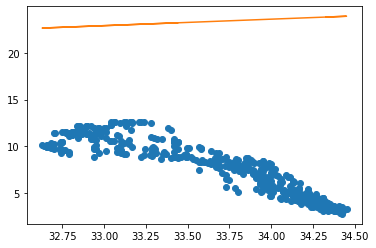

In [114]:

salinity = raw.salinity.to_numpy().reshape((-1,1))
temperature = raw.temperature.to_numpy().reshape((-1,1))
dataset = Dataset(salinity,temperature)
#dataset.mean_norm()
dataset.feature_scaling()
model = gradient_descent(dataset, 0.1)

ypredict = model.fX
dataset.plot_data()
plt.plot(model.X, ypredict)

#initial prediction, without training
#random inital parameters
model.theta

Text(0.5, 1.0, 'Mean Square Error')

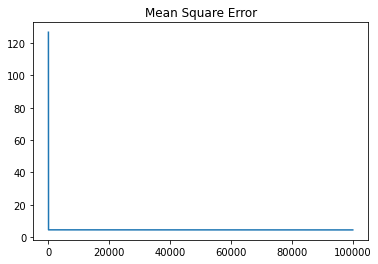

In [115]:
error= []
error.append(model.mean_sq_error)

#training loop  100000 epochs (deata withot normalization)
for i in range(100000):
    model.train_epoch()
    model.update()
    error.append(model.mean_sq_error)
plt.plot(error)
plt.title('Mean Square Error')

array([[0.93932308],
       [0.20210877]])

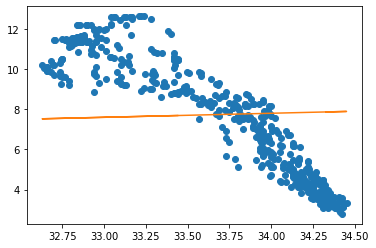

In [116]:
#trained model WITHOUT NORMALIZATION
ypredict = model.fX
dataset.plot_data()
plt.plot(model.X, ypredict)
model.theta